# Probability
- Sample Space
- Probability Axioms
- Probability Properties
- Discrete and Continous

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Probability

In [2]:
sample_space = [(i,j) for i in range(1,7) for j in range(1,7)]
print(sample_space)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [3]:
outcomes = list(map(lambda x : sum(x), sample_space))
print(outcomes)
print('Outcomes count: {}'.format(len(outcomes)))

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]
Outcomes count: 36


In [4]:
event_1 = [outcomes[i] for i,v in enumerate(outcomes) if v <= 9]
print(event_1)
print('Event 1 count: {}'.format(len(event_1)))

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9]
Event 1 count: 30


In [5]:
prob_event1 = len(event_1)/len(outcomes)
prob_event1

0.8333333333333334

## Bayes
$P(H_i|A_i)=\frac{P(H_i)*P(A_i|H_i)}{P(A_i)}$

In [6]:
# Event H Probability
event_H = [o for o in sample_space if o[0] != o[1]]
print(event_H)
print('Event A count: {}'.format(len(event_H)))

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
Event A count: 30


In [7]:
sum_event_H = list(map(lambda o : sum(o), event_H))
print(sum_event_H)

[3, 4, 5, 6, 7, 3, 5, 6, 7, 8, 4, 5, 7, 8, 9, 5, 6, 7, 9, 10, 6, 7, 8, 9, 11, 7, 8, 9, 10, 11]


In [8]:
P_H = len(event_H)/len(sample_space)
P_H

0.8333333333333334

In [9]:
# Event A Probability
event_A = [sample_space[i] for i, v in enumerate(outcomes) if v==6]
print(event_A)
print('Event B count: {}'.format(len(event_A)))

[(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
Event B count: 5


In [10]:
sum_even_A = list(map(lambda o : sum(o), event_A))
print(sum_even_A)

[6, 6, 6, 6, 6]


In [11]:
P_A = len(event_A)/len(sample_space)
P_A

0.1388888888888889

In [12]:
# Event A given H
eventA_givenH = [event_H[i] for i, v in enumerate(sum_event_H) if v == 6]
eventA_givenH

[(1, 5), (2, 4), (4, 2), (5, 1)]

In [13]:
P_AH = len(eventA_givenH)/len(event_H)
P_AH

0.13333333333333333

In [14]:
# Even H given A with Bayes
eventH_givenA = [o for o in event_A if o[0] != o[1]]
eventH_givenA

[(1, 5), (2, 4), (4, 2), (5, 1)]

In [15]:
P_HA = (P_H*P_AH)/P_A
P_HA

0.8

## Create Dataframe

In [16]:
df = pd.DataFrame({'sample':sample_space, 'outcomes':outcomes})
df.head()

,sample,outcomes
0,"(1, 1)",2
1,"(1, 2)",3
2,"(1, 3)",4
3,"(1, 4)",5
4,"(1, 5)",6


In [17]:
df.outcomes.value_counts()

7     6
6     5
8     5
5     4
9     4
4     3
10    3
3     2
11    2
2     1
12    1
Name: outcomes, dtype: int64

In [18]:
df.outcomes.value_counts()/ df.outcomes.value_counts().sum()

7     0.166667
6     0.138889
8     0.138889
5     0.111111
9     0.111111
4     0.083333
10    0.083333
3     0.055556
11    0.055556
2     0.027778
12    0.027778
Name: outcomes, dtype: float64

## Probability Distribution

<img src='Standard_Distribution.png' width=600 height=400>

#### Formula
$f(x)=\frac{1}{σ\sqrt{2π}}e^{-\frac{1}{2}(\frac{x-μ}{σ})^2}$

σ = standard deviation

μ = mean

In [19]:
mean = 3.25
std = 3.2
x = 30

In [20]:
# 1 away
def prob_dens(x, mean, std):
    term1 = np.sqrt(2*np.pi)*std
    term2 = (1/term1)*np.exp(-0.5*((x-mean)/std)**2)
    return term2

In [21]:
prob_dens(x, mean, std)

8.350171207760068e-17

In [22]:
# 2 ways
from scipy.stats import norm
norm(mean, std).pdf(x)

8.35017120776007e-17

## Probability project

In [23]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [24]:
df.shape

(294478, 5)

In [25]:
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [26]:
# Find the number of rows in the data
df.shape[0]

294478

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [28]:
# the number of unique users in the data
df['user_id'].nunique()

290584

In [29]:
# the proportion users converted
df['converted'].value_counts(1)

0    0.880341
1    0.119659
Name: converted, dtype: float64

In [30]:
print(np.round(len(df.query('converted == 1'))/len(df),2)*100, '%')

12.0 %


In [31]:
print(np.round(len(df.query('converted == 0'))/len(df),2)*100, '%')

88.0 %


In [32]:
# the number of times the new_page and treament don't match
df.query('landing_page == "new_page" & group != "treatment"').shape[0]

1928

In [33]:
# do any of the rows have missing values?
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [34]:
# group is treatment for landing page is new page
df_01 = df.query('landing_page == "new_page" & group == "treatment"')
df_01.iloc[:5]

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [35]:
# group is control for landing page is old page
df_02 = df.query('landing_page == "old_page" & group == "control"')
df_02.iloc[:5]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [36]:
# store new dataframe in df2
df2 = pd.concat([df_01,df_02], axis=0)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [37]:
df_01.shape, df_02.shape, df2.shape

((145311, 5), (145274, 5), (290585, 5))

In [38]:
# how many unique user_ids are in df2
df2['user_id'].nunique()

290584

In [39]:
# there is 1 user_id repeated in df2, find it?
df2[df2.duplicated(subset='user_id', keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [40]:
# remove one of rows with a duplicate user_id, but keep your data as df2
df2.drop_duplicates(subset='user_id', inplace=True)

In [41]:
df2.shape[0]

290584

In [42]:
# probability of an individual converting regardiess of the page they receive?
df2['converted'].value_counts(1)

0    0.880403
1    0.119597
Name: converted, dtype: float64

In [43]:
# given that an individual was in the control group, what is the probability they converted
df2[(df2['group'] == "control")]['converted'].value_counts(1)

0    0.879614
1    0.120386
Name: converted, dtype: float64

In [44]:
# given that an individual was in the tratment group, what is the probability they converted
df2[(df2['group'] == 'treatment')]['converted'].value_counts(1)

0    0.881192
1    0.118808
Name: converted, dtype: float64

In [45]:
# what is the probability that an individual received the new page?
len(df2.query('landing_page == "new_page"'))/df2.shape[0]

0.5000619442226688

In [46]:
# compare new_page and old_page probability
df2[(df2['landing_page'] == 'new_page')]['converted'].value_counts(1)[1]

0.11880806551510564

In [47]:
df2[(df2['landing_page'] == 'old_page')]['converted'].value_counts(1)[1]

0.1203863045004612

# Statistics

In [48]:
# qualitative values
products = ['Coca', 'Pepsi', 'Coke', 'Pepper', 'Sprite']
sale = np.array([5,10,15,20,25,30,35,40,45,50,5,10,25,30,35,5,40,40,20,30,25])

### Histogram Plot

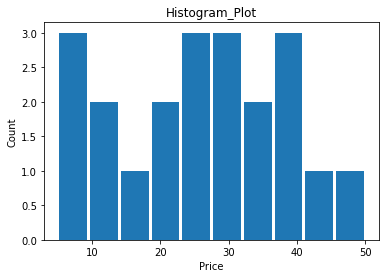

In [49]:
plt.hist(sale, rwidth=.9);
plt.title('Histogram_Plot');
plt.xlabel('Price');
plt.ylabel('Count');

## Boxplot

In [50]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [51]:
df_tip = sns.load_dataset('tips')
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


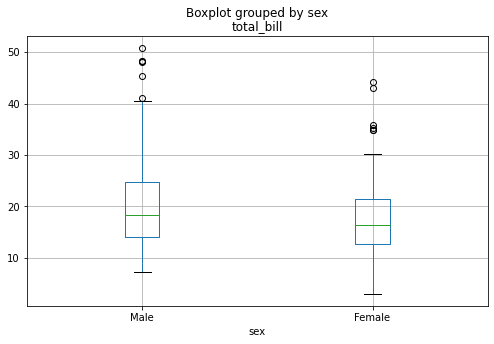

In [52]:
df_tip.boxplot(by='sex', column = 'total_bill', figsize=(8,5));

### Scatter Plot

In [53]:
# quantitative values
salary = np.array([134,545,234,5667,3232,554,5656,678,898,545,527,123,654,623,2134])
years = np.array([0,3,1,10,7,4,11,8,9,4,1,5,6,8,9])

In [54]:
from statistics import mean
from sklearn import linear_model

In [55]:
def best_fit_line(years,salary):
    slope = (((mean(years) * mean(salary)) - mean(years * salary)) / ((mean(years) * mean(years)) - mean(years * years)))
    y_intecept = mean(salary) - slope * mean(years)
    return slope, y_intecept

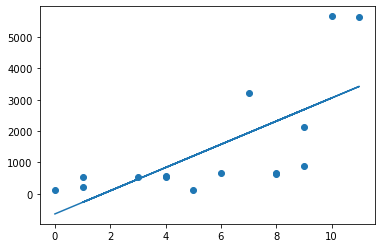

In [56]:
slope, y_intecept = best_fit_line(years,salary)
regression_line = [(slope*x) + y_intecept for x  in salary]
height_weight = linear_model.LinearRegression()
# Train the model using the training sets
height_weight.fit(years.reshape(-1,1),salary)
regression_line = height_weight.predict(years.reshape(-1,1))
plt.scatter(years, salary);
plt.plot(years, regression_line);

In [57]:
def statistics(x):
    print('min: ', np.min(x))
    print('max: ', np.max(x))
    print('range: ', np.max(x)-np.min(x))
    print('mean: ', np.mean(x))
    print('median: ', np.median(x))
    print('varience: ', np.var(x))
    print('standard: ', np.std(x))

In [58]:
statistics(sale)

min:  5
max:  50
range:  45
mean:  25.714285714285715
median:  25.0
varience:  179.2517006802721
standard:  13.388491351913856


### Choice sample

In [59]:
sample_sale = np.random.choice(sale, size=10)
sample_sale

array([20, 30, 25, 30, 30, 20, 40, 30, 25, 40])

In [60]:
statistics(sample_sale)

min:  20
max:  40
range:  20
mean:  29.0
median:  30.0
varience:  44.0
standard:  6.6332495807108


### Hypothesis

#### Example:
- When

n = 40

x = 13.25

σ =3.2

α =0.05

- Hypothesis

$H_0$: μ <= 12

$H_1$: μ > 12

- z-score

$z = \frac{x-μ}{\frac{α}{\sqrt {n}}}$

<=> $z = \frac{13.25-12}{\frac{0.05}{\sqrt {40}}}$ = 2.47

- p-value

p-value = 0.68% < 0.05

##### => Choice $H_1$

## Statistics project

In [61]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [62]:
df2.shape

(290584, 5)

In [63]:
pNew = df2.query('converted == 1').shape[0]/df2.shape[0]
pNew

0.11959708724499628

In [64]:
pOld = pNew
pOld

0.11959708724499628

In [65]:
# what is the conversion rate for P_old under the null?
df2.query('converted == 1').shape[0]/df2.shape[0]

0.11959708724499628

In [66]:
# what is n_new the number of individuals in the treatment group?
df2.query('landing_page == "new_page"').nunique()

user_id         145310
timestamp       145310
group                1
landing_page         1
converted            2
dtype: int64

In [67]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
n_new

145310

In [68]:
# what is n_old the number of individuals in the control group?
df2.query('landing_page == "old_page"').nunique()

user_id         145274
timestamp       145274
group                1
landing_page         1
converted            2
dtype: int64

In [69]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_old

145274

In [70]:
# simulate n_new transaction with a conversion rate of p_new under null. Store these n_new 1's and 0's in the new_page_converted.
new_page_converted = np.random.choice([0,1], n_new, p = (pNew, 1-pNew))
new_page_converted.shape

(145310,)

In [71]:
old_page_converted = np.random.choice([0,1], n_old, p = (pNew, 1-pNew))
old_page_converted.shape

(145274,)

In [72]:
# find p_new - p_old for your simulated values from part before
new_page_converted.mean() - old_page_converted.mean()

-0.0011404881138387113

In [73]:
def Simulate(nA, pA, nB, pB):
    new_page_converted = np.random.choice([0,1], nA, p=(pA, 1-pA))
    old_page_converted = np.random.choice([0,1], nB, p=(pB, 1-pB))
    diff = new_page_converted.mean() - old_page_converted.mean()
    return diff

In [74]:
pdiff = []
for _ in range(1000):
    diff = Simulate(n_new, pNew, n_old, pOld)
    pdiff.append(diff)

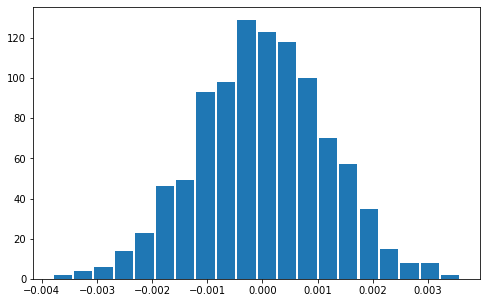

In [75]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pdiff, bins=20, rwidth=.9);

In [76]:
# what proportion of the p_diffs are greater than the actual difference observed in data
obs_New = df2.query('landing_page == "new_page" & converted == 1').shape[0]/ \
df2.query('landing_page == "new_page"').shape[0]
obs_New

0.11880806551510564

In [77]:
obs_Old = df2.query('landing_page == "old_page" & converted == 1').shape[0]/ \
df2.query('landing_page == "old_page"').shape[0]
obs_Old

0.1203863045004612

In [78]:
obs_diff = obs_New - obs_Old
obs_diff

-0.0015782389853555567

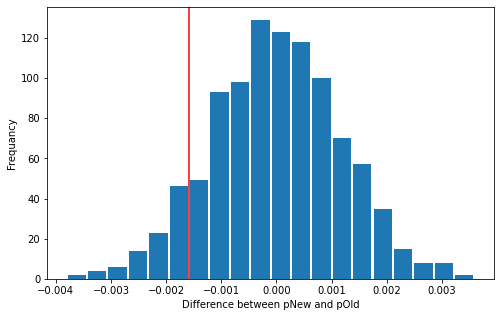

In [79]:
plt.figure(figsize=(8,5))
plt.hist(pdiff, bins=20, rwidth=.9);
plt.axvline(obs_diff, c='r');
plt.xlabel('Difference between pNew and pOld');
plt.ylabel('Frequancy');

In [80]:
# p-value
np.mean([diff > obs_diff for diff in pdiff])

0.902

In [81]:
# conversion times for new page
convert_new = df2.query('landing_page == "new_page" & converted == 1')['user_id'].nunique()
convert_new

17264

In [82]:
# conversion times for old page
convert_old = df2.query('landing_page == "old_page" & converted == 1')['user_id'].nunique()
convert_old

17489

In [83]:
# use stats.proportions_ztest to test statistic and p-value
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), 
                                              np.array([n_new,n_old]), 
                                              alternative='larger')

In [84]:
print('z_score = ', z_score)
print('p-value = ', p_value)

z_score =  -1.3109241984234394
p-value =  0.9050583127590245


In [85]:
# standard of 95% 
from scipy.stats import norm
norm.ppf(1-(0.05/2))

1.959963984540054